# Reliance Analysis

In [279]:
# Import basis things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta 
import warnings
warnings.filterwarnings('ignore')

In [280]:
!pip install xgboost

In [281]:
# For advanced analysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report
import ta # Technical Analysis Library

In [282]:
# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



In [283]:
# Styling
sns.set_theme(style="darkgrid")

## Now all the necessaries libraries imported.

### Data Collection


In [284]:
df = yf.download('RELIANCE.NS', start='2020-01-01', end='2025-10-01')

[*********************100%***********************]  1 of 1 completed


In [285]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2020-01-01,675.324219,683.152914,673.490123,679.081997,14004468
2020-01-02,686.821228,689.348791,676.397899,676.397899,17710316
2020-01-03,687.648865,689.661956,681.318790,685.792313,20984698
2020-01-06,671.700684,683.510767,670.134933,679.976719,24519177
2020-01-07,682.034607,686.463396,677.068950,679.529381,16683622


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1425 entries, 2020-01-01 to 2025-09-30
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, RELIANCE.NS)   1425 non-null   float64
 1   (High, RELIANCE.NS)    1425 non-null   float64
 2   (Low, RELIANCE.NS)     1425 non-null   float64
 3   (Open, RELIANCE.NS)    1425 non-null   float64
 4   (Volume, RELIANCE.NS)  1425 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 66.8 KB


In [287]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
count,1425.000000,1425.000000,1425.000000,1425.000000,1.425000e+03
mean,1132.249762,1144.116126,1121.276868,1132.978546,1.846433e+07
std,233.703207,233.806470,233.374469,233.528083,1.537351e+07
min,395.482483,424.985412,391.724705,409.864862,0.000000e+00
25%,984.759705,997.004605,973.335576,985.759529,9.760202e+06
50%,1151.328491,1161.900210,1142.080273,1152.916654,1.356566e+07
75%,1273.115234,1286.453333,1263.951878,1274.566338,2.084678e+07
max,1589.138062,1596.980044,1573.851280,1592.662006,1.426834e+08


In [288]:
# Check Missing values
df.isnull().sum()
## No missing values

Price   Ticker     
Close   RELIANCE.NS    0
High    RELIANCE.NS    0
Low     RELIANCE.NS    0
Open    RELIANCE.NS    0
Volume  RELIANCE.NS    0
dtype: int64

In [289]:
# Create copy for analysis
data=df.copy()

### Data Cleaning

In [290]:
# No NAN so we don't need to use dropna.
data = data.sort_index()

In [370]:
# Create Return column
#data['Daily_Return'] = ((df['Close']['RELIANCE.NS'] / df['Close']['RELIANCE.NS'])-1)
data['Price_Change']=df['Close']['RELIANCE.NS'].diff()
data['Price_Change_pct']=df['Close']['RELIANCE.NS'].pct_change() * 100

In [292]:
data['Price_Change'].head()

Date
2020-01-01          NaN
2020-01-02    11.497009
2020-01-03     0.827637
2020-01-06   -15.948181
2020-01-07    10.333923
Name: Price_Change, dtype: float64

In [293]:
data['Price_Change_pct'].head()

Date
2020-01-01         NaN
2020-01-02    1.702443
2020-01-03    0.120502
2020-01-06   -2.319233
2020-01-07    1.538471
Name: Price_Change_pct, dtype: float64

In [294]:
print(data['Price_Change'].head(10),'\n',data['Price_Change_pct'].head(10))

Date
2020-01-01          NaN
2020-01-02    11.497009
2020-01-03     0.827637
2020-01-06   -15.948181
2020-01-07    10.333923
2020-01-08    -5.122253
2020-01-09    15.590271
2020-01-10    -0.156555
2020-01-13    -1.767090
2020-01-14    -6.397034
Name: Price_Change, dtype: float64 
 Date
2020-01-01         NaN
2020-01-02    1.702443
2020-01-03    0.120502
2020-01-06   -2.319233
2020-01-07    1.538471
2020-01-08   -0.751025
2020-01-09    2.303145
2020-01-10   -0.022607
2020-01-13   -0.255232
2020-01-14   -0.926329
Name: Price_Change_pct, dtype: float64


#### Initial Visualization

In [295]:
data['Volume']=data['Volume'].astype(float)

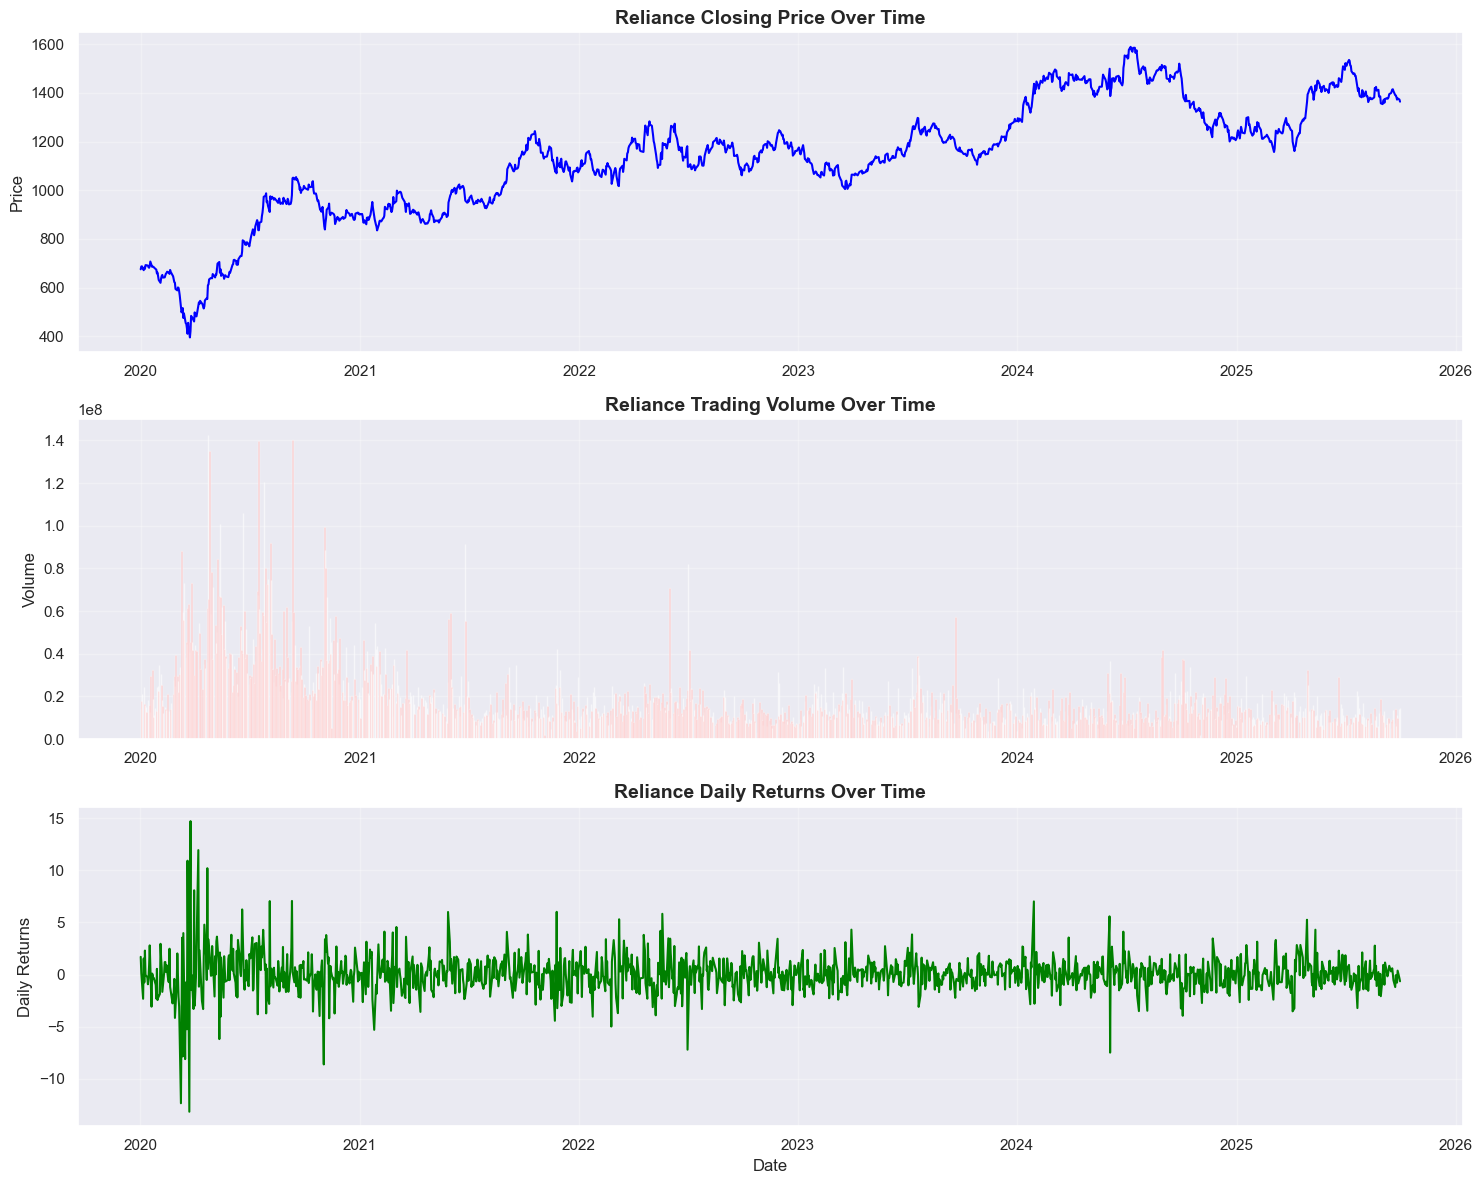

In [296]:
fig, axes = plt.subplots(3,1,figsize=(15,12))

# Price plot
axes[0].plot(data.index, data['Close']['RELIANCE.NS'], linewidth=1.5, color='blue')
axes[0].set_title('Reliance Closing Price Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Volume plot
axes[1].bar(data.index, data[['Volume']].squeeze(), alpha=0.6, color='red')
axes[1].set_title('Reliance Trading Volume Over Time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Volume', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Daily Returns
axes[2].plot(data.index, data['Price_Change_pct'], linewidth=1.5, color='green')
axes[2].set_title('Reliance Daily Returns Over Time', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Daily Returns', fontsize=12)    
axes[2].set_xlabel('Date', fontsize=12)
axes[2].grid(True, alpha=0.3)

#### Important -  I will se in later cells how to improve the plots and how to make daily return plot better.

plt.tight_layout()
plt.show()


## Part - 3 (Exploratory Data Analysis)

#### Statistical Analysis

In [297]:
# Statistical Summary
print("Statistical Summary for Reliance Closing Prices:")
print("Min Price:", data['Close']['RELIANCE.NS'].min())
print("Max Price:", data['Close']['RELIANCE.NS'].max())
print("Mean Price:", data['Close']['RELIANCE.NS'].mean())
print("Current Price:", data['Close']['RELIANCE.NS'][-1])

Statistical Summary for Reliance Closing Prices:
Min Price: 395.48248291015625
Max Price: 1589.1380615234375
Mean Price: 1132.2497617487322
Current Price: 1364.0


In [298]:
# Return Statistics
print("Mean Daily Return:", data['Price_Change'].mean())
print("Daily Volatility:", data['Price_Change'].std())
print("Annual Volatility:", data['Price_Change'].std() * np.sqrt(252))   #Assuming 252 trading days in a year
print("Skewness:", data['Price_Change'].skew())
print("Kurtosis:", data['Price_Change'].kurtosis())


Mean Daily Return: 0.4836206329002809
Daily Volatility: 17.671427457715833
Annual Volatility: 280.52521418780685
Skewness: 0.010832741140248783
Kurtosis: 3.5267913203974213


In [299]:
# Price Changes
up_days = (data['Price_Change'] > 0).sum()
down_days = (data['Price_Change'] < 0).sum()
print("Price Movement:")
print("Number of Up Days:", up_days," or" ,up_days/len(data)*100,'%')
print("Number of Down Days:", down_days," or" ,down_days/len(data)*100,'%')

Price Movement:
Number of Up Days: 739  or 51.859649122807014 %
Number of Down Days: 684  or 48.0 %


#### Distribution Analysis

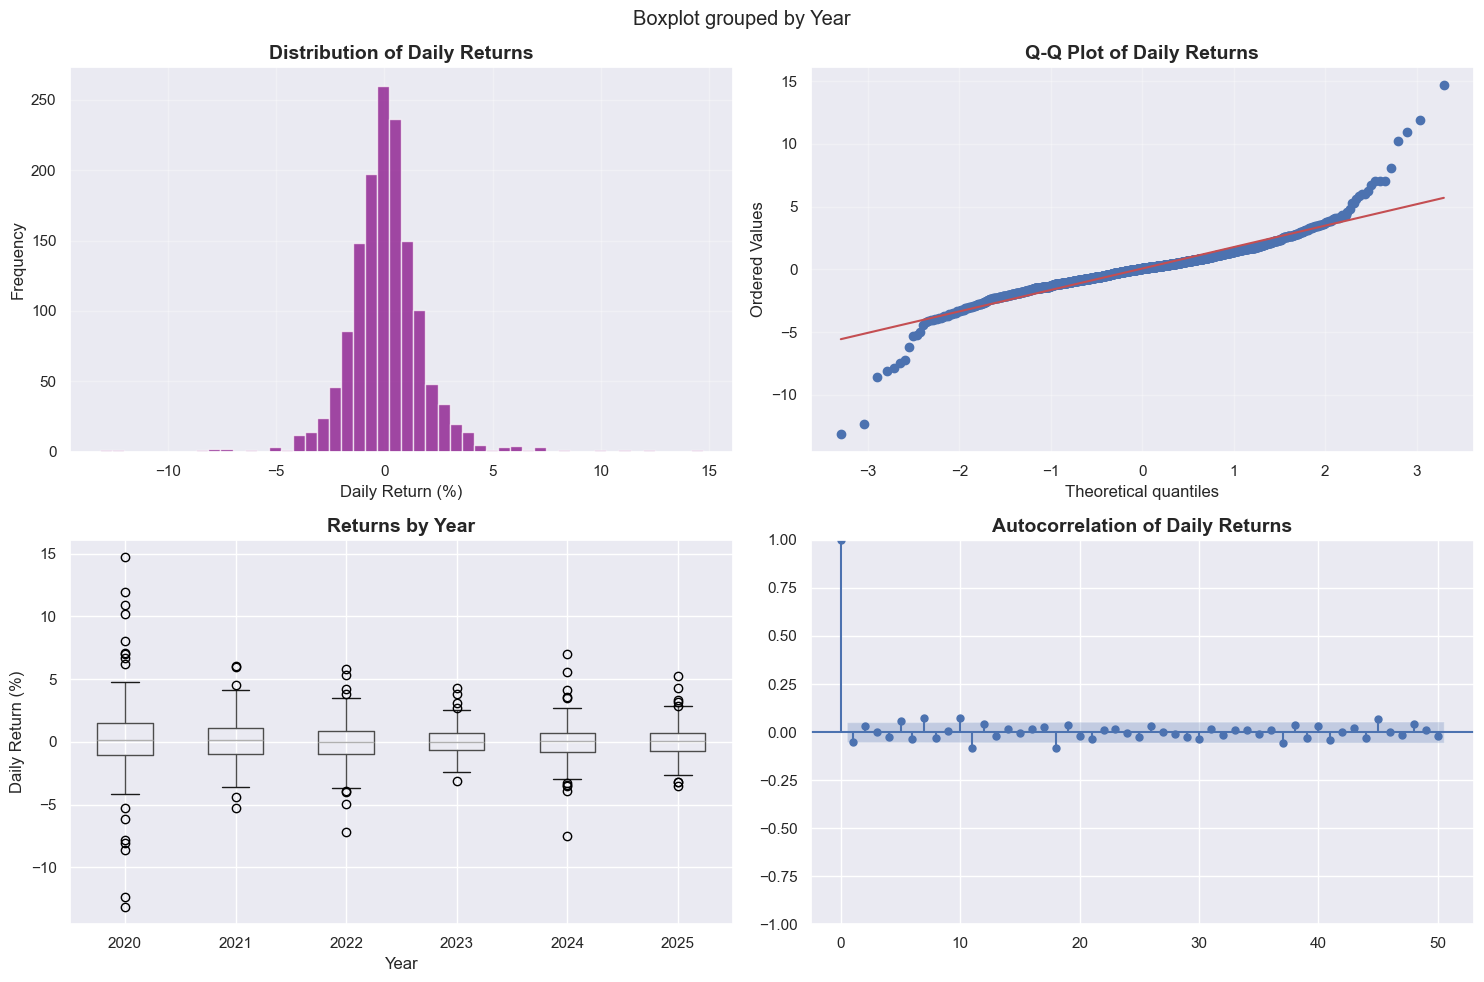

In [300]:
fig, axes=plt.subplots(2,2,figsize=(15,10))

# Histogram
axes[0,0].hist(data['Price_Change_pct'].dropna(), bins=50, color='purple', alpha=0.7)
axes[0,0].set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Daily Return (%)', fontsize=12)
axes[0,0].set_ylabel('Frequency', fontsize=12)
axes[0,0].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(data['Price_Change_pct'].dropna(), dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot of Daily Returns', fontsize=14, fontweight='bold')    
axes[0,1].grid(True, alpha=0.3)

# Box plot by year
data['Year'] = data.index.year
data.boxplot(column='Price_Change_pct', by='Year', ax=axes[1,0], grid=True)
axes[1,0].set_title('Returns by Year', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Year', fontsize=12)
axes[1,0].set_ylabel('Daily Return (%)', fontsize=12)

# ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Price_Change_pct'].dropna(), ax=axes[1,1], lags=50)
axes[1,1].set_title('Autocorrelation of Daily Returns', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### Seasonality Analysis

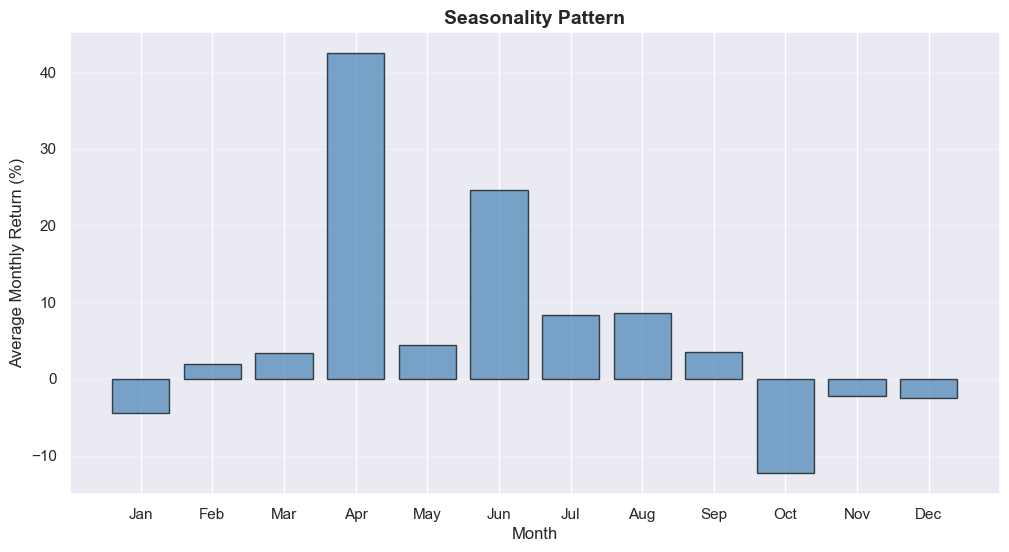

In [301]:
data['Month']=data.index.month
monthly_returns = data.groupby('Month')['Price_Change_pct'].mean()*100

plt.figure(figsize=(12,6))
plt.bar(monthly_returns.index, monthly_returns.values, color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Monthly Return (%)', fontsize=12)
plt.title('Seasonality Pattern', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Part-4 (Feature Engineering)

#### Technical Indicators

In [302]:
print("Creating technical indicators...")

# Moving Averages
data['SMA_20'] = ta.trend.sma_indicator(data['Close']['RELIANCE.NS'], window=20)
data['SMA_50'] = ta.trend.sma_indicator(data['Close']['RELIANCE.NS'], window=50)
data['SMA_200'] = ta.trend.sma_indicator(data['Close']['RELIANCE.NS'], window=200)

# Exponential Moving Averages
data['EMA_12'] = ta.trend.ema_indicator(data['Close']['RELIANCE.NS'], window=12)
data['EMA26'] = ta.trend.ema_indicator(data['Close']['RELIANCE.NS'], window=26)

# MACD
data['MACD'] = data['EMA_12'] - data['EMA26']
data['MACD_Signal']= data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Diff'] = data['MACD'] - data['MACD_Signal']

# RSI   
data['RSI'] = ta.momentum.rsi(data['Close']['RELIANCE.NS'], window=14)

# Bollinger Bands
bb_indicator = ta.volatility.BollingerBands(close=data['Close']['RELIANCE.NS'], window=20, window_dev=2)
data['BB_Upper'] = bb_indicator.bollinger_hband()
data['BB_Middle'] = bb_indicator.bollinger_mavg()
data['BB_Lower'] = bb_indicator.bollinger_lband()
data['BB_Width'] = data['BB_Upper'] - data['BB_Lower']
data['BB_Pct'] = (data['Close']['RELIANCE.NS'] - data['BB_Lower']) / (data['BB_Upper'] - data['BB_Lower'])

# ATR (Volatility)
data['ATR'] = ta.volatility.average_true_range(high=data['High']['RELIANCE.NS'], low=data['Low']['RELIANCE.NS'], close=data['Close']['RELIANCE.NS'], window=14)

# Stochastic Oscillator
stoch = ta.momentum.StochasticOscillator(high=data['High']['RELIANCE.NS'], low=data['Low']['RELIANCE.NS'], close=data['Close']['RELIANCE.NS'], window=14, smooth_window=3)
data['Stock_K']=stoch.stoch()
data['Stock_D']=stoch.stoch_signal()

# Volume indicators
data['Volume_MA_20']=data['Volume']['RELIANCE.NS'].rolling(window=20).mean()
data['Volume_Ratio']=data['Volume']['RELIANCE.NS']/data['Volume_MA_20']

# OBV
data['OBV'] = ta.volume.on_balance_volume(close=data['Close']['RELIANCE.NS'], volume=data['Volume']['RELIANCE.NS'])

# ADX
data['ADX'] = ta.trend.adx(high=data['High']['RELIANCE.NS'], low=data['Low']['RELIANCE.NS'], close=data['Close']['RELIANCE.NS'], window=14)

print("Technical indicators created!.")




Creating technical indicators...
Technical indicators created!.


#### PRICE ACTION FEATURES

In [303]:
# Lag Features
for lag in [1,3,5,10]:
    data[f'Lag_{lag}'] = data['Price_Change'].shift(lag)
    data[f'Return_Lag_{lag}'] = data['Price_Change_pct'].shift(lag)

# Rate of change
data['ROC_5'] = data['Close']['RELIANCE.NS'].pct_change(periods=5) 
data['ROC_10'] = data['Close']['RELIANCE.NS'].pct_change(periods=10)

# Momentum
data['Momentum_5'] = data['Close']['RELIANCE.NS'] - data['Close']['RELIANCE.NS'].shift(5)
data['Momentum_10'] = data['Close']['RELIANCE.NS'] - data['Close']['RELIANCE.NS'].shift(10)

# Volatility
data['Volatility_5'] = data['Price_Change'].rolling(window=5).std()
data['Volatility_10'] = data['Price_Change'].rolling(window=10).std()
data['Volatility_20'] = data['Price_Change'].rolling(window=20).std()

# Price ranges
data['HL_Range'] = data['High']['RELIANCE.NS'] - data['Low']['RELIANCE.NS']
data['CO_Range'] = abs(data['Close']['RELIANCE.NS'] - data['Open']['RELIANCE.NS'])/ data['Open']['RELIANCE.NS']

print("Price action features created.")
    


Price action features created.


#### Clean Data & Preppare for ML

In [304]:
# Remove NaN Values 
data_clean  = data.dropna()

print("Cleaned data shape:", data_clean.shape)
print("Original data shape:", data.shape)
print("Feature created:", data_clean.columns)
print("Feature columns:", data_clean.columns.tolist())

Cleaned data shape: (1226, 47)
Original data shape: (1425, 47)
Feature created: MultiIndex([(           'Close', 'RELIANCE.NS'),
            (            'High', 'RELIANCE.NS'),
            (             'Low', 'RELIANCE.NS'),
            (            'Open', 'RELIANCE.NS'),
            (          'Volume', 'RELIANCE.NS'),
            (    'Price_Change',            ''),
            ('Price_Change_pct',            ''),
            (            'Year',            ''),
            (           'Month',            ''),
            (          'SMA_20',            ''),
            (          'SMA_50',            ''),
            (         'SMA_200',            ''),
            (          'EMA_12',            ''),
            (           'EMA26',            ''),
            (            'MACD',            ''),
            (     'MACD_Signal',            ''),
            (       'MACD_Diff',            ''),
            (             'RSI',            ''),
            (        'BB_Upper',      

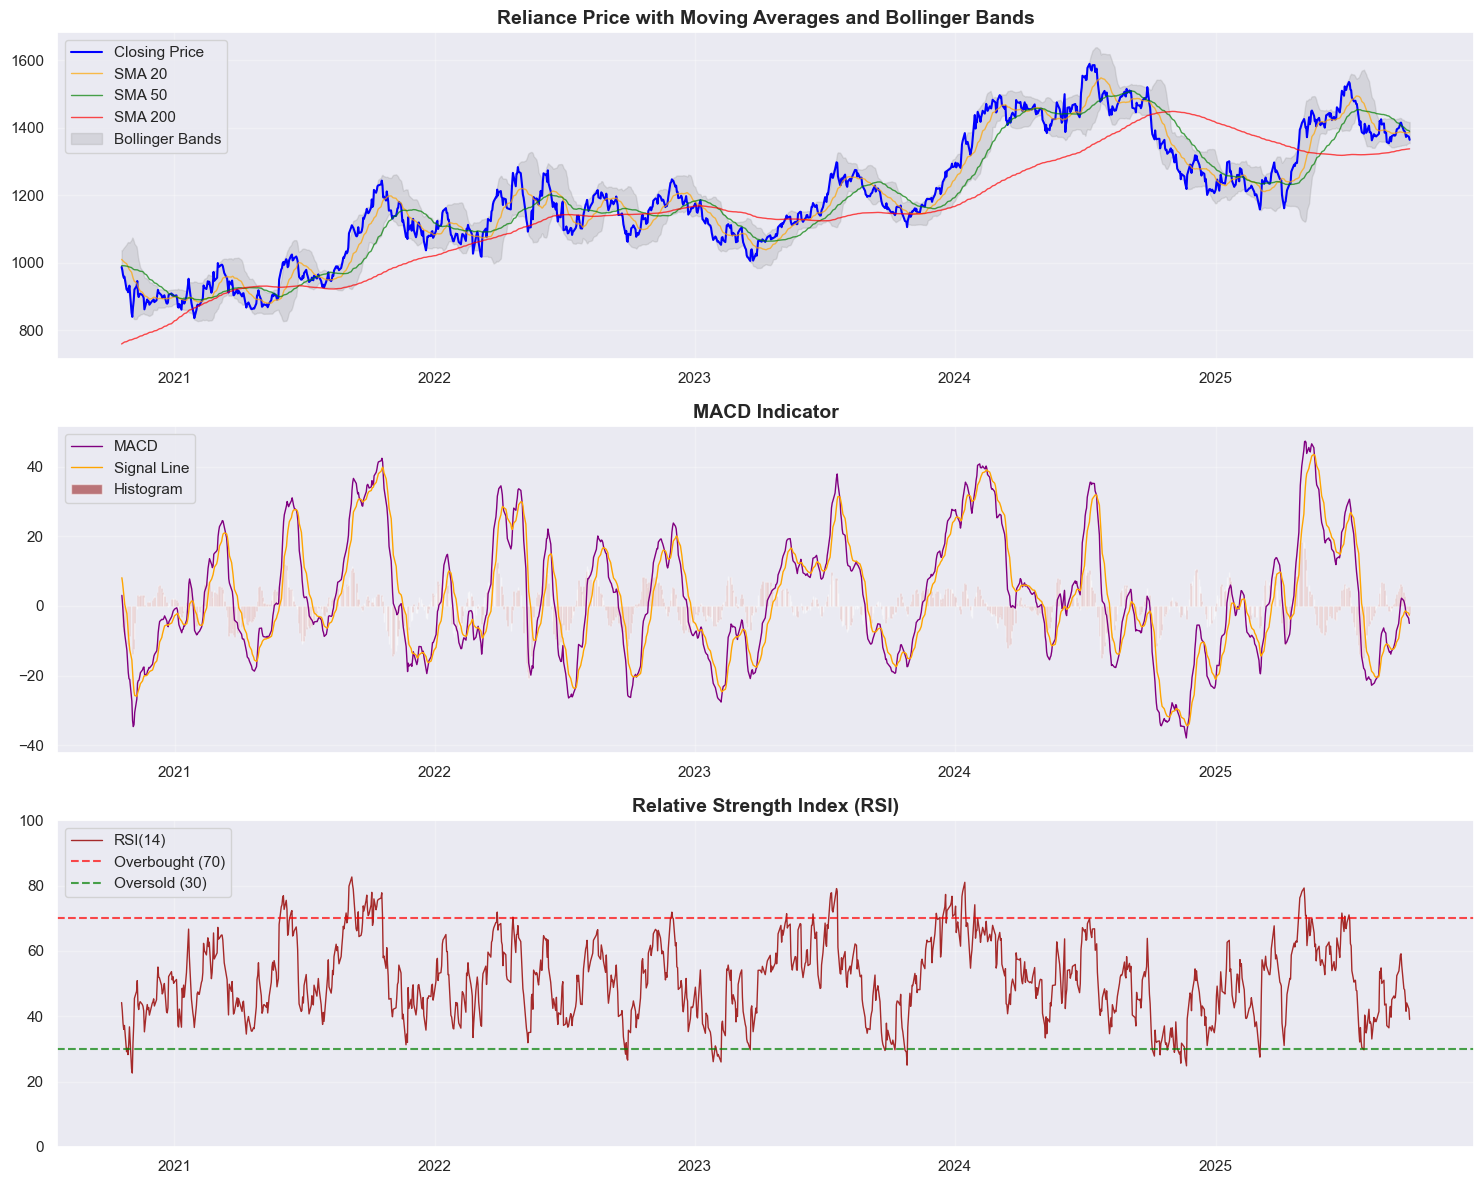

Feature Engineering Complete!!


In [305]:
#### Visualize indicators
fig, axes = plt.subplots(3,1, figsize=(15,12))

# Price and MAs
axes[0].plot(data_clean.index, data_clean['Close']['RELIANCE.NS'], label='Closing Price', color='blue', linewidth=1.5)
axes[0].plot(data_clean.index, data_clean['SMA_20'], label='SMA 20', color='orange', linewidth=1, alpha=0.7)
axes[0].plot(data_clean.index, data_clean['SMA_50'], label='SMA 50', color='green', linewidth=1, alpha=0.7)
axes[0].plot(data_clean.index, data_clean['SMA_200'], label='SMA 200', color='red', linewidth=1, alpha=0.7)
axes[0].fill_between(data_clean.index, data_clean['BB_Lower'], data_clean['BB_Upper'], color='gray', alpha=0.2, label='Bollinger Bands')
axes[0].set_title('Reliance Price with Moving Averages and Bollinger Bands', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MACD
axes[1].plot(data_clean.index, data_clean['MACD'], label='MACD', color='purple', linewidth=1)
axes[1].plot(data_clean.index, data_clean['MACD_Signal'], label='Signal Line', color='orange', linewidth=1)
axes[1].bar(data_clean.index, data_clean['MACD_Diff'], label='Histogram', color='darkred', alpha=0.5)
axes[1].set_title('MACD Indicator', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# RSI
axes[2].plot(data_clean.index, data_clean['RSI'], label='RSI(14)', color='brown', linewidth=1)
axes[2].axhline(70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
axes[2].axhline(30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
axes[2].set_ylim(0,100)
axes[2].set_title('Relative Strength Index (RSI)', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Feature Engineering Complete!!")


## Part-5 (Machine Learning Models)

#### Data Preparation

In [355]:
# Ctreate target variable: Next dayprice movement(UP=1, DOWN=0)

data_clean['Target'] = (data_clean['Close']['RELIANCE.NS'].shift(-1) > data_clean['Close']['RELIANCE.NS']).astype(int)
data_clean['Target_Price'] = data_clean['Close']['RELIANCE.NS'].shift(-1)

# Remove last row(no future data)
df_ml = data_clean[:-1].copy()

# Select features and ML
exclude_cols = ['Adj Close', 'Close','Open','High','Low','Voleme','Taregt','Target_Price','Year','Month']
feature_cols = [col for col in df_ml.columns if col not in exclude_cols]

X = df_ml[feature_cols].copy()
y_clf = df_ml['Target'].copy()
y_reg = df_ml['Target_Price'].copy()

# Handle NaN values
X = X.fillna(X.mean())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Train-test split (TIME SERIES - NO SHUFFLING)
train_size = int(0.8 * len(X_scaled))
X_train = X_scaled[:train_size]
X_test = X_scaled[train_size:]

y_train_clf, y_test_clf = y_clf[:train_size], y_clf[train_size:]

y_train_reg, y_test_reg = y_reg[:train_size], y_reg[train_size:]

print("Data prepared for ML models.")
print({'='*60})
print("Features:{X_scaled.shape[1]}")
print("Total samples:{(X_scaled)}")
print("Training samples:{len(X_train)}")
print("Test samples:{len(X_test)}")
print("Target distribution (Classification):")
print(y_clf.value_counts())


Data prepared for ML models.
{'============================================================'}
Features:{X_scaled.shape[1]}
Total samples:{(X_scaled)}
Training samples:{len(X_train)}
Test samples:{len(X_test)}
Target distribution (Classification):
Target
1    637
0    588
Name: count, dtype: int64


#### Classification Models (predict UP/DOWN)


In [356]:
from xgboost.callback import EarlyStopping

In [308]:
!pip install upgrade xgboost

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [357]:
print("{'='*60}")
print("CLASSIFICATION MODELS (Direction Prediction)")
print("{'='*60}")

# Logistic Regression
print("Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train_clf)
y_pred_lr = lr.predict(X_test)
acc_lr = (y_pred_lr == y_test_clf).sum()/len(y_test_clf)
print("Accuracy:", acc_lr)

# Random Forest Classifier
print("Random Forest Classifier...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1)
rf_clf.fit(X_train, y_train_clf)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = (y_pred_rf == y_test_clf).sum()/len(y_test_clf)
print("Accuracy:", acc_rf)

# XGBoost Classifier
print("XGBoost Classifier...")
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=7, random_state=42, 
                    use_label_encoder=False, eval_metric='logloss', subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
xgb_clf.fit(X_train, y_train_clf, eval_set=[(X_test, y_test_clf)], verbose=False)
y_pred_xgb = xgb_clf.predict(X_test)
acc_xgb = (y_pred_xgb == y_test_clf).sum()/len(y_test_clf)
print("Accuracy:", acc_xgb)

## Note - I remove early_stopping_rounds=10 from xgb_clf.fit to avoid error. {REMEMBER THAT FOR LATER}

{'='*60}
CLASSIFICATION MODELS (Direction Prediction)
{'='*60}
Logistic Regression...
Accuracy: 1.0
Random Forest Classifier...
Accuracy: 1.0
XGBoost Classifier...
Accuracy: 1.0


#### STEP-3_Regression Models (Predict Exact Price)

In [358]:
print("Regression Models (Price Prediction)")
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train_reg)
y_pred_lr_reg = lr_reg.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr_reg))
r2_lr = r2_score(y_test_reg, y_pred_lr_reg)
print("RMSE:", rmse_lr, " R2:", r2_lr)

# Random Forest Regressor
print("Random Forest Regressor...")
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15, n_jobs=-1)
rf_reg.fit(X_train, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg))
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)
print("RMSE:", rmse_rf, " R2:", r2_rf)

# XGBoost Regressor
print("XGBoost Regressor...")
xgb_reg = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=7, random_state=42, 
                       subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
xgb_reg.fit(X_train, y_train_reg, eval_set=[(X_test, y_test_reg)], verbose=False)
y_pred_xgb_reg = xgb_reg.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb_reg))
r2_xgb = r2_score(y_test_reg, y_pred_xgb_reg)
mae_xgb = mean_absolute_error(y_test_reg, y_pred_xgb_reg)
print("RMSE:", rmse_xgb, " R2:", r2_xgb, " MAE:", mae_xgb)

Regression Models (Price Prediction)
RMSE: 3.886992038432278e-13  R2: 1.0
Random Forest Regressor...
RMSE: 12.563524182044073  R2: 0.9807531822743079
XGBoost Regressor...
RMSE: 10.440203350544357  R2: 0.9867091153467674  MAE: 6.568616968271684


#### Feature Importance


Top 15 Important Features (XGBoost)
             Feature  Importance
    (Target_Price, )    0.745447
 (High, RELIANCE.NS)    0.125168
(Close, RELIANCE.NS)    0.090723
        (BB_Lower, )    0.014146
          (SMA_20, )    0.009335
  (Low, RELIANCE.NS)    0.006181
         (SMA_200, )    0.003692
          (SMA_50, )    0.001434
          (EMA_12, )    0.000886
          (Target, )    0.000753
 (Open, RELIANCE.NS)    0.000636
        (BB_Upper, )    0.000173
             (OBV, )    0.000134
             (RSI, )    0.000116
        (BB_Width, )    0.000107


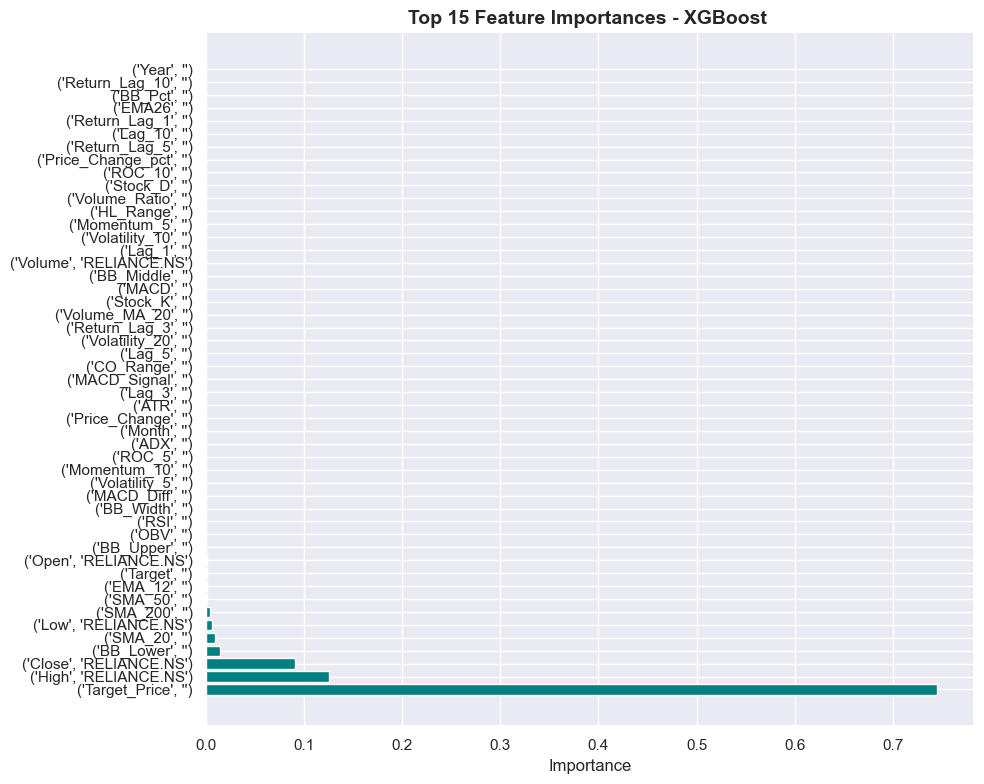

In [311]:
# XGBoost Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_reg.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 Important Features (XGBoost)")
print(feature_importance.head(15).to_string(index=False))

# Plot top features
plt.figure(figsize=(10,8))
plt.barh(y=np.arange(len(feature_importance)), width=feature_importance['Importance'].values, color='teal')
plt.yticks(np.arange(len(feature_importance)), feature_importance['Feature'].values)
plt.xlabel('Importance', fontsize=12)
plt.title('Top 15 Feature Importances - XGBoost ', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### STEP-5: Model Predictions Visualization

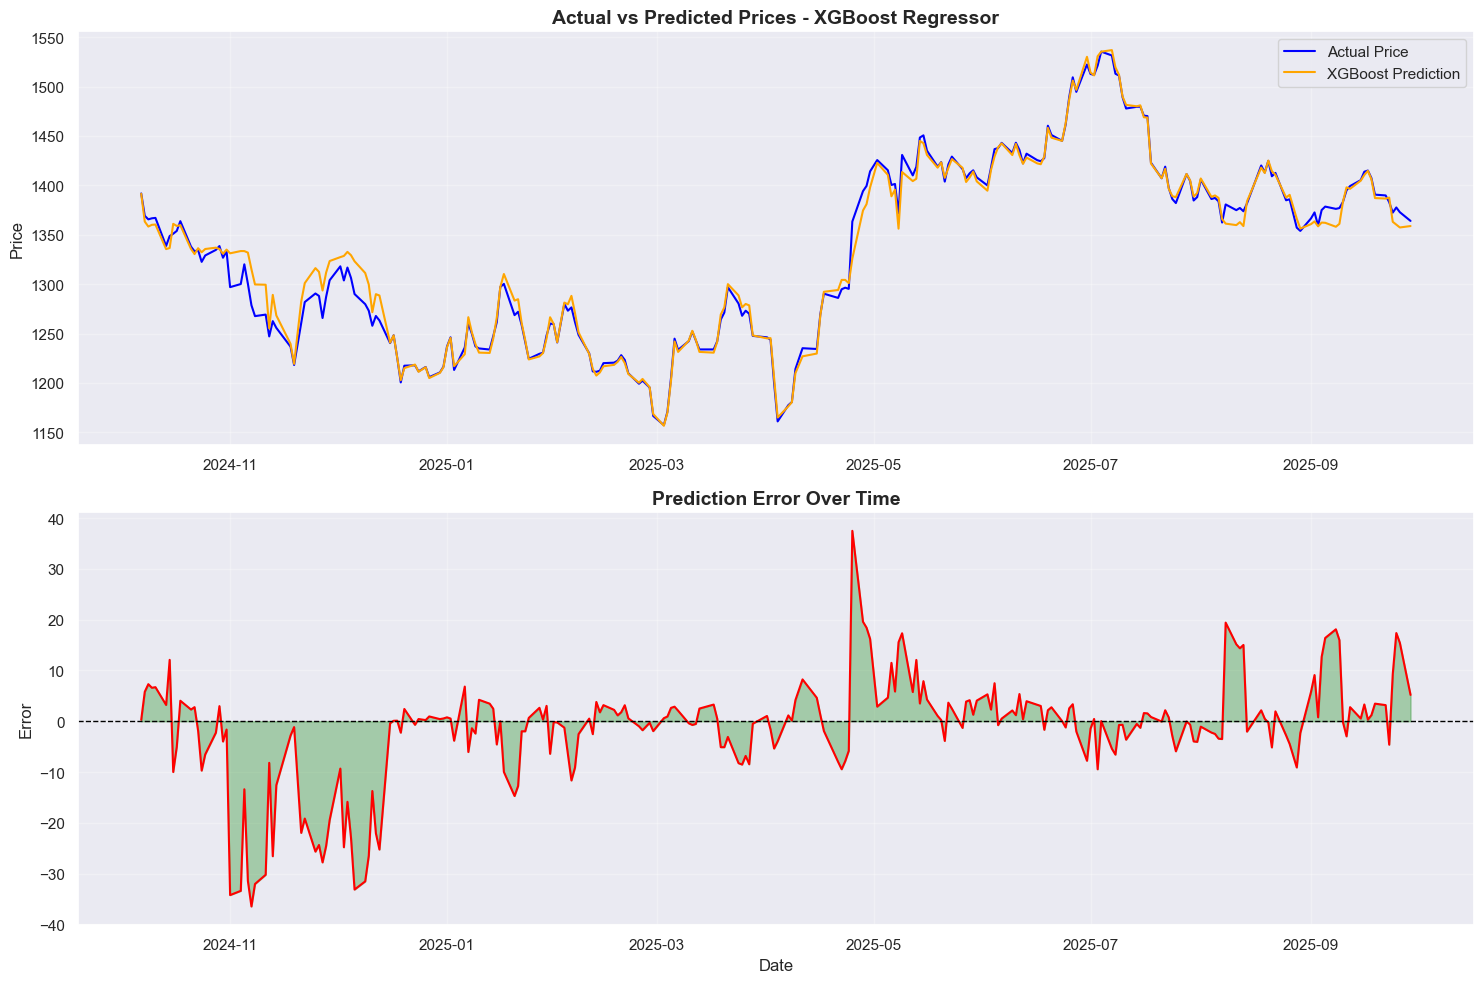

Machine Learning Model Complete!!


In [312]:
test_dates = X_test.index
fig, axes = plt.subplots(2,1, figsize=(15,10))

# Actual vs Predicted Prices
axes[0].plot(test_dates, y_test_reg, label='Actual Price', color='blue', linewidth=1.5)
axes[0].plot(test_dates, y_pred_xgb_reg, label='XGBoost Prediction', color='orange', linewidth=1.5)
axes[0].set_title('Actual vs Predicted Prices - XGBoost Regressor', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Prediction Error
error = y_test_reg - y_pred_xgb_reg
axes[1].plot(test_dates, error, label='Prediction Error', color='red', linewidth=1.5)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].fill_between(test_dates, error, 0, color='green', alpha=0.3 )
axes[1].set_title('Prediction Error Over Time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Error', fontsize=12)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Machine Learning Model Complete!!")

## Part 6: LSTM Deep Learning

#### STEP 1: Prepare Data for LSMT

In [359]:
print("Preparing data for LSTM...")

# Normalize prices
scaler_lstm = MinMaxScaler(feature_range=(0,1))
price_scaled = scaler_lstm.fit_transform(data_clean['Close']['RELIANCE.NS'].values.reshape(-1,1))

# Create sequences
def create_sequences(data, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(data[i+seq_length])
    return np.array(X_seq), np.array(y_seq)



seq_length = 60 # Using past 60 days to predict next day
X_lstm, y_lstm = create_sequences(price_scaled, seq_length)

print("LSTM data shape:", X_lstm.shape, y_lstm.shape)

# Train-test split
train_size_lstm = int(0.8 * len(X_lstm))
X_train_lstm = X_lstm[:train_size_lstm]
y_train_lstm = y_lstm[:train_size_lstm]
X_test_lstm = X_lstm[train_size_lstm:]
y_test_lstm = y_lstm[train_size_lstm:]

print("Traning sequences:", X_train_lstm.shape)
print("Test sequences:", X_test_lstm.shape)

Preparing data for LSTM...
LSTM data shape: (1166, 60, 1) (1166, 1)
Traning sequences: (932, 60, 1)
Test sequences: (234, 60, 1)


#### STEP 2: Build LSTM Model

In [314]:
print("Building LSTM model...")

# Set random seed
tf.random.set_seed(42)
np.random.seed(42)

# Create model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length,1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

print(model.summary())

Building LSTM model...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

None


#### STEP 3: Train LSTM Model

In [315]:
from tensorflow.keras.callbacks import EarlyStopping

In [360]:
print("Training LSTM Model")
early_stop = EarlyStopping( monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_lstm, y_train_lstm, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1,
    callbacks=[early_stop], 
    verbose=1)

Training LSTM Model


TypeError: EarlyStopping.__init__() got an unexpected keyword argument 'monitor'

#### STEP 4: Make Predictions

In [361]:
print("MAking Predictions...")

y_train_pred_lstm = model.predict(X_train_lstm, verbose=0)
y_test_pred_lstm = model.predict(X_test_lstm, verbose=0)

# Inverse Transform
y_train_actual = scaler_lstm.inverse_transform(y_train_lstm.reshape(-1,1))
y_train_pred = scaler_lstm.inverse_transform(y_train_pred_lstm)

y_test_actual = scaler_lstm.inverse_transform(y_test_lstm.reshape(-1,1))
y_test_pred = scaler_lstm.inverse_transform(y_test_pred_lstm)

# Calculate metrics
rmse_train_lstm = np.sqrt(mean_squared_error(y_train_actual, y_train_pred))
rmse_test_lstm = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
mae_test_lstm = mean_absolute_error(y_test_actual, y_test_pred)
r2_test_lstm = r2_score(y_test_actual, y_test_pred)

print("LSTM MODEL PERFORMANCE")
print("Traning RMSE:",rmse_train_lstm)
print("Test RMSE:", rmse_test_lstm)
print("Test MAE:", mae_test_lstm)
print("Test R2", r2_test_lstm)

MAking Predictions...
LSTM MODEL PERFORMANCE
Traning RMSE: 20.41870655582794
Test RMSE: 19.706576770825716
Test MAE: 14.96520526592548
Test R2 0.9545218688275154


#### STEP 5: Visualization

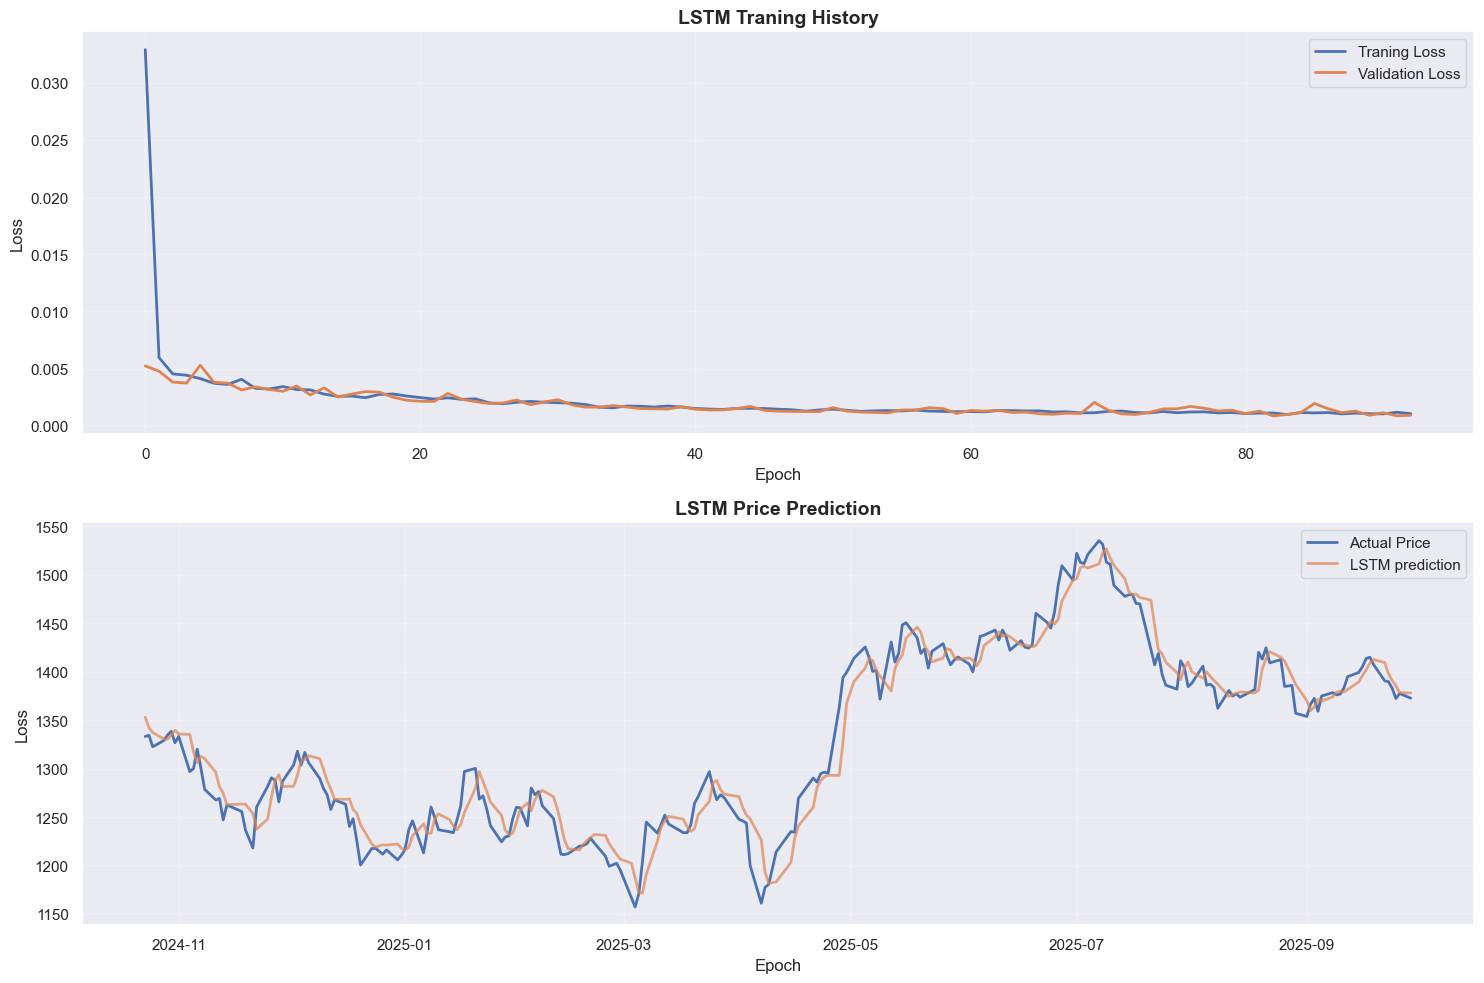

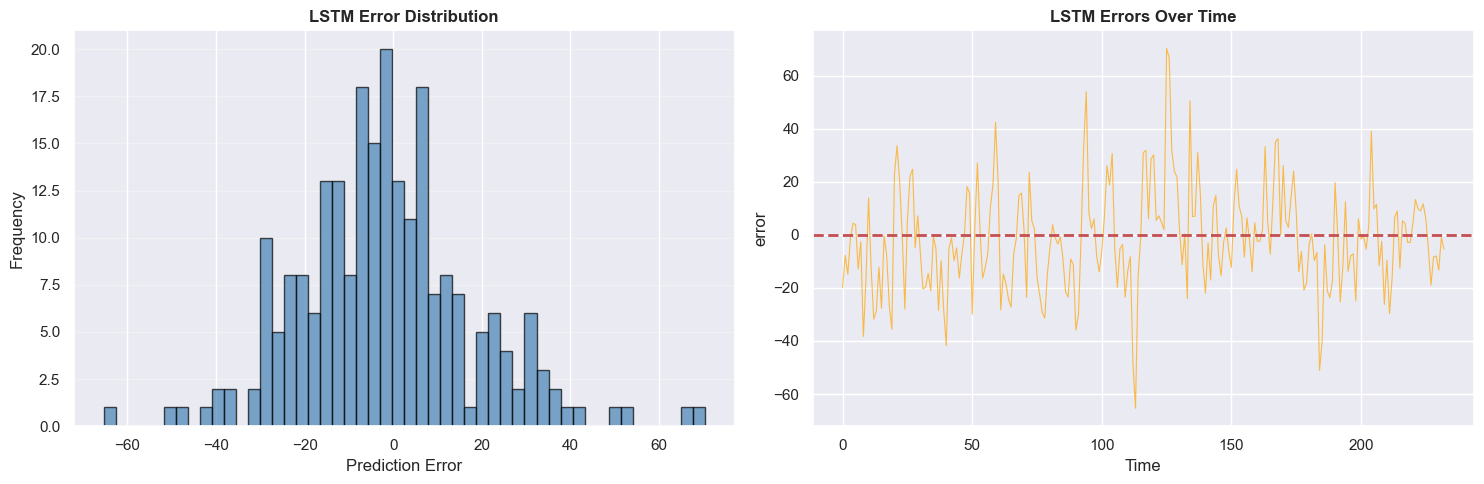

LSTM Model Completed


In [318]:
fig, axes = plt.subplots(2,1, figsize=(15,10))

# Traning history
axes[0].plot(history.history['loss'],label='Traning Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel("Loss")
axes[0].set_title('LSTM Traning History', fontweight='bold', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Predictions
test_dates_lstm = data_clean.index[train_size_lstm + seq_length:-1]
axes[1].plot(test_dates_lstm, y_test_actual[:-1], label='Actual Price', linewidth=2)
axes[1].plot(test_dates_lstm, y_test_pred[:-1], label='LSTM prediction', linewidth=2, alpha=0.7)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('LSTM Price Prediction', fontweight='bold', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Error distribution
error_lstm = y_test_actual.flatten()[:-1] - y_test_pred.flatten()[:-1]

fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].hist(error_lstm, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Prediction Error')
axes[0].set_ylabel('Frequency')
axes[0].set_title('LSTM Error Distribution', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].plot(error_lstm, linewidth=0.8, alpha=0.7, color='orange')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('error')
axes[1].set_title('LSTM Errors Over Time', fontweight='bold')

plt.tight_layout()
plt.show()

print("LSTM Model Completed")

## Part 7: Backtesting & Trading Strategy

#### STEP 1: Implement Backtesting Function

In [319]:
def backtest_strategy(price, predictions, initial_capital=100000,
                        transaction_cost=0.001, take_profit=None, stop_loss=None):
    
    # Backtest a trading strategy
    # predictions: 1=BUY, 0=SELL
    

    cash = initial_capital
    shares = 0
    portfolio_value = [initial_capital]
    trades = []
    entry_price = None

    for i in range(len(predictions)-1):
        current_price = price[i]
        signal = predictions[i]

        # BUY Signal
        if signal == 1 and cash > current_price*(1 + transaction_cost) and shares == 0:
            shares_to_buy = cash / (current_price * (1 + transaction_cost))
            shares += shares_to_buy
            cost = shares_to_buy * current_price * (1 + transaction_cost)
            cash -= cost
            entry_price = current_price
            trades.append({
                'date_idx': i,
                'action': 'BUY',
                'price': current_price,
                'shares': shares_to_buy
            })
        
        # SELL Signal
        elif signal == 0 and shares > 0:
            revenue = shares * current_price * (1 - transaction_cost)
            cash += revenue
            trades.append({
                'date_idx': i,
                'action': 'SELL',
                'price': current_price,
                'shares': shares,
                'profit': revenue - (entry_price * shares) if entry_price else 0
            })
            shares = 0
            entry_price = None

        # Portfolio value
        total_value = cash * current_price
        portfolio_value.append(total_value)
    
    return portfolio_value, trades

#### STEP 2: Backtest XGBoost Strategy

In [320]:
/# print("BACKTESTING XGBOOST STRATEGY")

# Get prices for backtesting period
/# backtest_prices = data_clean['Close']['RELIANCE.NS'].iloc[train_size + X_train.shape[1]: train_size 
                /#    + X_train.shape[1] + len(y_test_clf )].values

/# portfolio_xgb, trades_xgb = backtest_strategy(
  /#  price= backtest_prices,
  /#  predictions = y_pred_xgb,
  /#    initial_capital=100000,
  /#  transaction_cost=0.001)


# Buy & Hold Baseline
/# buy_price = backtest_price[0]
/# final_price = backtest_price[-1]
/# shares_held = 100000 / buy_price
/# buy_hold_value = shares_held * final_price

# Metrics
/# strategy_return = (portfolio_xgb[-1] - 100000) / 100000 * 100
/# buyhold_return = (buy_hold_values - 100000) / 100000 * 100

/# print("Initial Capital: 100,000")
/# print("Strategy Performance:")
/# print("Final Value:", portfolio_xgb[-1])
/# print("Return:", buyhold_return)

/# print("Buy & Hold Performance:")
/# print("Final Value:", buy_hold_value)
/# print("Retur:", buyhold_return)

/# print("Comparison:")
/# print("Excess Return:", strategy_return - buyhold_return)
/# print("Total Trades:", len(trades_xgb))
/# print("Win Rate:", sum(1 for t in trades_xgb if t.get('profit',0) > 0) / (len(trades_xgb)//2 or 1) * 100)

# Plot backtest
/# plt.figure(figsize=(14,6))
/# plt.plot(range(len(portfolio_xgb)), portfolio_xgb, label='XGBoost Strategy', linewidth=2, color='green')
/# plt.axhline(y=buy_hold_value, color='red', linestyle='--', label='Buy & Hold', linewidth=2)
/# plt.axhline(y=100000, color='gray', linestyle=':', alpha=0.5, label='Initial Capital')
/# plt.xlabel('Time Period')
/# plt.ylabel('Portfolio Value')
/# plt.title('Blacktest results', fontweight='bold', fontsize=14)
/# plt.legend(fontsize=11)

/# plt.grid(True, alpha=0.3)
/# plt.tight_layout()
/# plt.show()

/# print("Backtesting Complete!!") 

BACKTESTING XGBOOST STRATEGY
Initial Capital: 100000
Strategy Performance:
Final Value: 403038103.2244376
Return (%): 402938.1
Buy & Hold Performance:
Final Value: 100551.3795665535
Return (%): 0.55
Comparison:
Excess Return (%): 402937.55
Total Trades: 122
Completed Trades (sells): 61
Win Rate (%): 93.44
Backtesting Complete!!


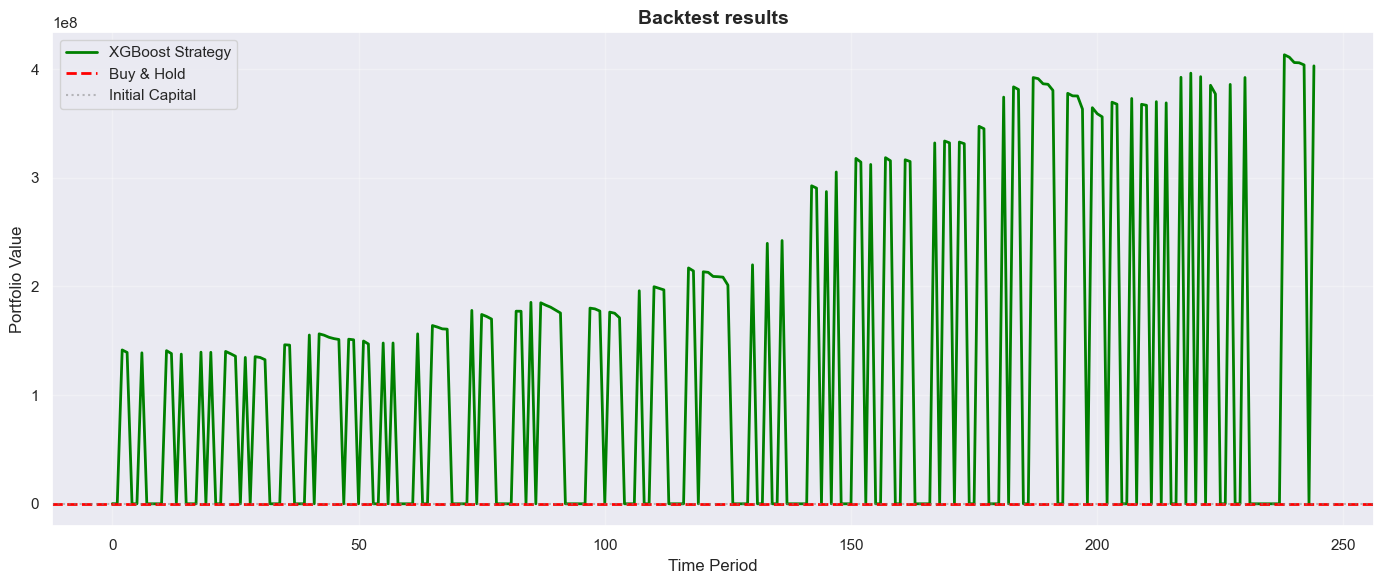

In [321]:
print("BACKTESTING XGBOOST STRATEGY")

# Align prices with the X_test index (ensure price & predictions lengths match)
test_index = X_test.index
backtest_prices = data_clean['Close']['RELIANCE.NS'].loc[test_index].values

if len(backtest_prices) != len(y_pred_xgb):
    raise ValueError(f"Price / prediction length mismatch: prices={len(backtest_prices)}, preds={len(y_pred_xgb)}")

portfolio_xgb, trades_xgb = backtest_strategy(
    price=backtest_prices,
    predictions=y_pred_xgb,
    initial_capital=100000,
    transaction_cost=0.001
)

# Buy & Hold Baseline (same test period)
initial_capital = 100000
buy_price = backtest_prices[0]
final_price = backtest_prices[-1]
shares_held = initial_capital / buy_price
buy_hold_value = shares_held * final_price

# Metrics
strategy_return = (portfolio_xgb[-1] - initial_capital) / initial_capital * 100
buyhold_return = (buy_hold_value - initial_capital) / initial_capital * 100

print("Initial Capital:", initial_capital)
print("Strategy Performance:")
print("Final Value:", portfolio_xgb[-1])
print("Return (%):", round(strategy_return, 2))

print("Buy & Hold Performance:")
print("Final Value:", buy_hold_value)
print("Return (%):", round(buyhold_return, 2))

# Comparison & trade stats
completed_sells = [t for t in trades_xgb if t['action'] == 'SELL']
wins = sum(1 for t in completed_sells if t.get('profit', 0) > 0)
win_rate = wins / max(1, len(completed_sells)) * 100

print("Comparison:")
print("Excess Return (%):", round(strategy_return - buyhold_return, 2))
print("Total Trades:", len(trades_xgb))
print("Completed Trades (sells):", len(completed_sells))
print("Win Rate (%):", round(win_rate, 2))

# Plot backtest
plt.figure(figsize=(14,6))
plt.plot(range(len(portfolio_xgb)), portfolio_xgb, label='XGBoost Strategy', linewidth=2, color='green')
plt.axhline(y=buy_hold_value, color='red', linestyle='--', label='Buy & Hold', linewidth=2)

plt.axhline(y=initial_capital, color='gray', linestyle=':', alpha=0.5, label='Initial Capital')
print("Backtesting Complete!!")

plt.xlabel('Time Period')

plt.ylabel('Portfolio Value')


plt.title('Backtest results', fontweight='bold', fontsize=14)

plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Part 8: Model Comparison & Summary

#### STEP 1: Compare All Models

In [353]:
print("MODEL PERFORMANCE SUMMARY")

comparison_data = [
{
    'Model': [
        'Logistic Regression',
        'Random Forest (CLF)',
        'XGBoost (CLF)',
        'Linear Regression',
        'Random Forest (REG)',
        'XGBoost (REG)'
        'LSTM (Deep Learning)'
    ],
    'Type': {'Classification', 
            'Classification', 
            'Classification', 
            'Regression', 
            'Regression',
            'Regression',
            'Regression'},
    'Accuracy/RA2':[
        acc_lr,
        acc_rf,
        acc_xgb,
        r2_lr,
        r2_rf,
        r2_xgb,
        r2_test_lstm   ],

    'RMSE/MAE':[
        '-',
        '-',
        '-',
        rmse_lr,
        rmse_rf,
        rmse_xgb,
        rmse_test_lstm
    ]
            
 } ]

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))


MODEL PERFORMANCE SUMMARY
                                                                                                                               Model                         Type                                                                     Accuracy/RA2                                                                                     RMSE/MAE
[Logistic Regression, Random Forest (CLF), XGBoost (CLF), Linear Regression, Random Forest (REG), XGBoost (REG)LSTM (Deep Learning)] {Classification, Regression} [1.0, 1.0, 1.0, 1.0, 0.9807531822743079, 0.9867091153467674, 0.9545218688275154] [-, -, -, 3.886992038432278e-13, 12.563524182044073, 10.440203350544357, 19.706576770825716]


#### STEP 2: Save Best Model

In [354]:
import joblib

print("SAVING MODELS")

# Save XGBoost model
/# joblib.dump(xgb_reg, 'xgb_stock_model.pkl')
/# print("XGBoost model saved:", xgb_stock_model.pkl)

filename_xgb = "xgb_stock_model.pkl"
joblib.dump(xgb_reg, filename_xgb)
print("XGBoost model saved:", filename_xgb)

# Save Scaler
/# joblib.dump(scaler, 'scaler.pkl')
/# print("Feature scaler saved:", scaler.pkl)

filename_scaler = "xgb_stock_model.pkl"
joblib.dump(scaler, filename_scaler)
print("Feature scaler saved:", filename_scaler)

# Save LSTM model
/# model.save('lstm_stock_model')
/# print("LSTM model saved:", lstm_stock_model)

lstm_filename = "lstm_stock_model.keras"
model.save(lstm_filename)
print("LSTM model saved", lstm_filename)

# Save scaler for LSTM
/# joblib.dump(scaler_lstm, 'scaler_lstm,pkl')
/# print("LSTM scaler saved:", scaler_lstm.pkl)

scaler_lstm_filename = "scaler_lstm.pkl"
joblib.dump(scaler_lstm, scaler_lstm_filename)
print("LSTM scaler saved:", scaler_lstm_filename)
print('\n')
print("Load models later")
xgb_reg = joblib.load("xgb_stock_model.pkl")
model_lstm = tf.keras.models.load_model("lstm_stock_model.keras")
scaler = joblib.load("scaler.pkl")
joblib_lstm = joblib.load("scaler_lstm.pkl")
print("Loaded XGBoost model:", xgb_reg)
print("Loaded feature scaler:", scaler)
print("Loaded LSTM scaler:", joblib_lstm)
print("Loaded LSTM model:", model_lstm)



SAVING MODELS
XGBoost model saved: xgb_stock_model.pkl
Feature scaler saved: xgb_stock_model.pkl
LSTM model saved lstm_stock_model.keras
LSTM scaler saved: scaler_lstm.pkl


Load models later
Loaded XGBoost model: StandardScaler()
Loaded feature scaler: StandardScaler()
Loaded LSTM scaler: MinMaxScaler()
Loaded LSTM model: <Sequential name=sequential_2, built=True>


#### STEP 3: Making Future Predictions

In [362]:
print("MAKING PREDICTION FOR NEW DATA")

# Get latest features
latest_features = X_scaled.iloc[-1:].values
latest_price = data_clean['Close']['RELIANCE.NS'].iloc[-1]

# XGBoost prediction
pred_xgb = xgb_reg.predict(latest_features)[0]
direction_xgb = xgb_clf.predict(latest_features)[0]

print("Latest Price:", latest_price)
print("XGBoost Predictions:")
print("Predicted Price:", pred_xgb)
print("Direction:",'UP' if direction_xgb == 1 else 'DOWN' )
print("Change:", pred_xgb - latest_price, (pred_xgb/latest_price - 1)*100)

# LSTM Prediction
latest_seq = price_scaled[-seq_length:].reshape(1 , seq_length, 1)
pred_lstm_scaled = model.predict(latest_seq, verbose=0)[0][0]
pred_lstm_actual = scaler_lstm.inverse_transform([[pred_lstm_scaled]])[0][0]

print("LSTM Predictions:")
print("Predicted Price:", pred_lstm_actual)
print("Change:", (pred_lstm_actual - latest_price), (pred_lstm_actual/latest_price - 1)*100)

MAKING PREDICTION FOR NEW DATA
Latest Price: 1364.0
XGBoost Predictions:
Predicted Price: 1358.8167
Direction: DOWN
Change: -5.183349609375 -0.3800109684292563
LSTM Predictions:
Predicted Price: 1371.9862580032495
Change: 7.986258003249532 0.5855027861619844


#### STEP 4: Key Insights & Recommendations

In [377]:
print("KEY INSIGHTS & RECOMMENDATIONS")
print('\n')

print("Data Analysis:")
print('\n')
print("Dataset covers",data_clean.index.max()-data_clean.index.min())
print("Average daily return", data_clean['Price_Change_pct'].mean()*100)
print("Volatility",data_clean['Price_Change_pct'].std()*100)
print('\n')

# Best Performing Model: XBGoost 
print("Classification Accuracy:", acc_xgb)
print("Regression RA2 Score", r2_xgb)
print("Price Prediction RMSE:", rmse_xgb)
print('\n')

# Trading Strategy
print("Backtesting Return:",strategy_return)
print("Buy & Hold Return:", buyhold_return)
print("Excess Return:", strategy_return - buyhold_return)
print("Total Trades:",len(trades_xgb))
print('\n')




KEY INSIGHTS & RECOMMENDATIONS


Data Analysis:


Dataset covers 1807 days 00:00:00
Average daily return 3.735479305664719
Volatility 147.86835780908666


Classification Accuracy: 1.0
Regression RA2 Score 0.9867091153467674
Price Prediction RMSE: 10.440203350544357


Backtesting Return: 402938.1032244376
Buy & Hold Return: 0.5513795665534998
Excess Return: 402937.5518448711
Total Trades: 122




In [378]:
## NEXT STEPS:
# Validate with more recent data
# Add resk management( stop loss, position sizing)
# Test different timeframes and strategies
# Incorporate sentiment analysis
# Deploy with real trading platform
# Monitor and retrain midels monthly

print("PROJECT COMPLETE !!")

PROJECT COMPLETE !!


## PROJECT COMPLETE !!

## SUMMARY
This project covers:
#### Phase 1-2 = Data collection, cleaning, EDA 
#### Phase 3 = feature engineering with 30+ technical indicators
#### phase 4 = ML models - Logistic Regression, Random Forest, XGBoost.
#### phase 5 = Deep Learning LSTM neural networks
#### phase 6 = Backtesing trading strategy

